<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/3FOURIER/1Fourier2doEjercicio_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 2

Encontrar la representación por serie exponencial de Fourier de la señal  x(t)=Arectτ(t) , con  t∈[−τ/2,τ/2] . Graficar el espectro, la fase del espectro, la reconstrucción para  n∈{0,±1,±2,…} , y determinar el valor del error relativo para cada valor de  n . Utilice el ambiente animación de Python para mostrar los resultados.

<ipython-input-23-5567fae51a30>:20: RuntimeWarning: divide by zero encountered in divide
  Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
<ipython-input-23-5567fae51a30>:20: RuntimeWarning: invalid value encountered in divide
  Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
<ipython-input-23-5567fae51a30>:20: RuntimeWarning: invalid value encountered in multiply
  Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


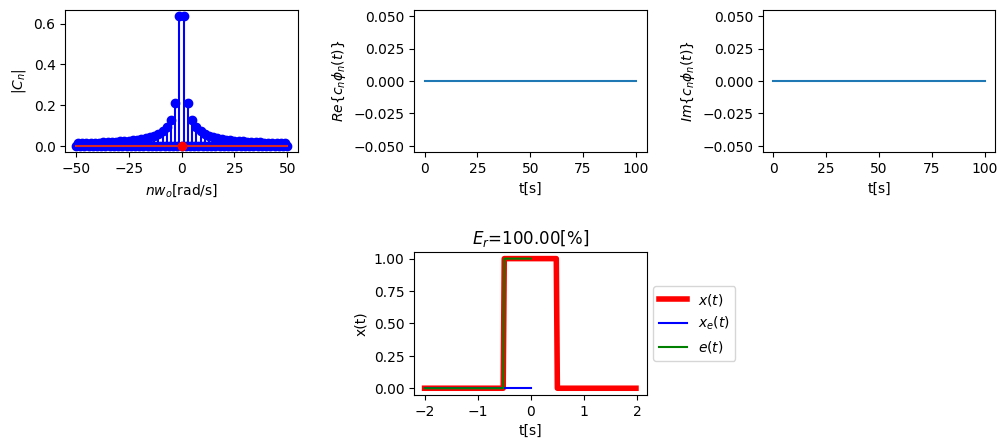

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display

A = 1        # Amplitud
tau = 1    # Ancho del pulso
T = 4 # segundos de gráfica
Fs = 50 # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
N= 50 #Numero de terminos en la serie de fourier

# Función de la señal rectángulo
def prect(t):
    return A * np.where(np.abs(t) <= tau/2, 1, 0)

# Coeficientes de la serie de Fourier
nv = np.linspace(-N, N, 2*N+1)  # Vector numérico de armónicos
Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
Cn[N] = 0  # Nivel DC C_0

# Inicializar la figura para la animación
fig, ax = plt.subplots(2, 3, figsize=(12, 5))

# Calcular magnitud del espectro
Px = np.sum(np.abs(Cn)**2)
tv = np.arange(-T/2,T/2,1/Fs)
phin = np.exp(1j * 2 * np.pi * nv.reshape(-1, 1) * tv)

xo = prect(tv)

# Función para gráfico interactivo
def update(n):
    for a in ax.flatten():
        a.clear()

    ind = np.arange(N-n, N+n+1)  # Armónicos a considerar

    ax[0, 0].stem(nv, abs(Cn), 'b')  # Magnitud del espectro
    ax[0, 0].stem(nv[ind], abs(Cn[ind]), 'r')  # Magnitud del espectro
    ax[0, 0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0, 0].set_ylabel(r'$|C_n|$')

    # Componentes espectrales
    ce = phin[:, ind].dot(np.diag(Cn[ind]))
    ax[0, 1].plot(np.real(ce))  # Componente real
    ax[0, 1].set_xlabel('t[s]')
    ax[0, 1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0, 2].plot(np.imag(ce))  # Componente imaginario
    ax[0, 2].set_xlabel('t[s]')
    ax[0, 2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    # Reconstrucción
    er = 1 - np.sum(abs(Cn[ind])**2) / Px
    xe = phin[:, ind].dot(Cn[ind])  # Señal reconstruida
    et = xo[:len(xe)] - xe

    ax[1, 1].plot(tv, xo, 'r', linewidth=4, label='$x(t)$')
    ax[1, 1].plot(tv[:len(xe)], xe, color='b', label='$x_e(t)$')  # Señal estimada o filtrada
    ax[1, 1].plot(tv[:len(et)], et, color='g', label='$e(t)$')  # Señal estimada o filtrada
    ax[1, 1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1, 1].set_xlabel('t[s]')
    ax[1, 1].set_ylabel('x(t)')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')
    plt.subplots_adjust(wspace=0.5, hspace=0.7)

# Desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, N+1, 1), blit=False)
display(HTML(anim.to_jshtml()))